Benemérita Universidad Autónoma de Puebla
![image](https://drive.google.com/uc?export=view&id=1Ugk24FB0FcMahW9jSEdIRPSZUoOUYnGy)



**<font color=#3333ff>Facultad de Ciencias Físco Matemáticas</font>**

![image 2](https://drive.google.com/uc?export=view&id=1C25kNo7qgW2tlW1SOqpmlyfnaZAG5IvJ)

> Posgrado en Ciencias (Física Aplicada)

Métodos Matemáticos

Prof. Dr. Javier M. Hernández Lopez

T10, P5
Transoformada Rápida de Fourier

Estudiante: 

*   Angel Ricardo Sánchez Zeferino


La transforma discreta de Fourier (DFT) se define como 

$
\hat{f}_{k} = \sum_{j=0}^{n-1} f_{k} e^{-i 2 \pi jk/n} \ \ \ \ \ \ \ (1)
$ 

mientras que la transformada discrete inversa de Fourier 

$
f_{k} =\dfrac{1}{n} \sum_{j=0}^{n-1} \hat{f}_{k} e^{i 2 \pi jk/n}  \ \ \ \ \ (2)
$ 

Dividiendo la ecuación (1) para los casos en que $n$ es par, y $n$ impar, se obtiene


$
\hat{f}_{k} = \sum_{j=0}^{n-1} f_{k} e^{-i 2 \pi jk/n} =  \sum_{m=0}^{n/2-1} f_{2m} e^{-i 2 \pi mk/(n/2)} + [e^{-i2 \pi k/n}\sum_{m=0}^{n/2-1} f_{2m+1} e^{-i 2 \pi mk/(n/2)}] = \hat{f}_{par} +e^{-i2 \pi k/n}\hat{f}_{impar} \ \ \ \ \ (3)
$ 



Es importante resaltar que en cada una de las últimas expresiones de la ecuació (3), solo se debe hacer el cálculo hasta N/2 términos.  Sin embargo utilizando la identidad 

$\hat{f}_{k+N} = \hat{f}_{k} \ \ \ \ \ (4)$

Vemos que ya no es necesario realizar la segunda sumatoria del lado derecho de la ecuación (3), por lo tanto solo es necesario realizar la mitad de las operaciones por cada sub-problema.


Sin embargo está técnica puede ser empleada cada vez que $n$ sea par, de esta forma salvando el costo computacional cada vez hasta que ya no sea beneficioso. 

# Implementación

Importamos las librerias necesarias

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import math as mt

In [6]:
#  Se explican los códigos desarrollados en [1,2]
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:  # Hace la división entre 2, si hay residuo arroja la alerta
                   # en caso contrario continua         
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT(x)  # Si es un valor pequeño aplica DFT
    else:
        #   Vuelve a aplicar los mismos pasos anteriores, pero antes
        #   divide el conjunto a pares e impares, una vez que el conjunto 
        #   tiene 32 puntos aplica DFT en el paso elif
        X_even = FFT(x[::2])  # Recorre los números pares
        X_odd = FFT(x[1::2])  # Recorre los números impares y les aplica FFT
        factor = np.exp(-2j * np.pi * np.arange(N)/N)
        return np.concatenate([X_even + factor[:int(N/2)] * X_odd,
                               X_even + factor[int(N/2):] * X_odd])

In [40]:
# Se crean 3 señalas cosenoidales con un poco de ruido
start   = 0
stop    = 1 
p       = 10
num       = 2**p
t       =  np.linspace(start,stop,num)   # Tiempo
Deltat  = t[2]-t[1]

# Parámetros de la señal
f1 = 5
f2 = 8
f3 = 12

# Señal
Funcion = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t) + np.cos(2*np.pi*f3*t)
FuncionConRuido = Funcion + 2*np.random.randn(len(t))

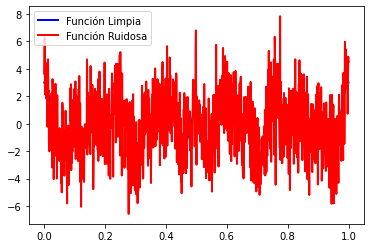

In [41]:
# Visualización 

plt.plot(t,Funcion,color = 'b',LineWidth=2,label='Función Limpia')
plt.plot(t,FuncionConRuido,color = 'r',LineWidth=2,label='Función Ruidosa')
plt.legend()

In [42]:
# Calculamos FFT con el código explicado y con ayuda de la paqueteria de python

fcomplex = FFT(FuncionConRuido)
fcomplexpy = np.fft.fft(FuncionConRuido)

# corroboramos que den el mismo resultado
np.allclose(fcomplex, fcomplexpy)

True

Ahora calcularemos el espectro de potencias (potencia por frecuencia) [3]

In [43]:
PSD = fcomplex*fcomplex.conjugate()/len(t)  # Espectro de potencias
frec = 1/(Deltat)*t                         # se crea el eje de las frecuencias
ind = PSD > 100                             # Se hace un filto
L = mt.floor(len(t)/16)                     # Se utiliza solo un segmento de las 
                                            # frecuencias
PSDclean = ind*PSD                          # Se utiliza un filtro
fcomplex2 = ind*fcomplex                    
ffiltrada = ifft(fcomplex2)                 # Se utiliza la ITF

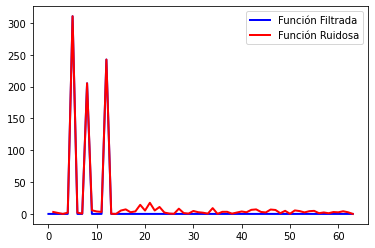

In [53]:
plt.plot(frec[0:L],PSDclean[0:L].real,"b",LineWidth=2,label='Función Filtrada')
plt.plot(frec[1:L],PSD[1:L].real,"r",LineWidth=2,label='Función Ruidosa')
plt.legend()

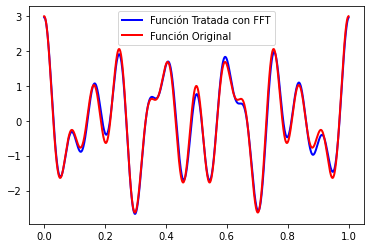

In [56]:
plt.plot(t,ffiltrada.real,color = 'b',LineWidth=2,label='Función Tratada con FFT')
plt.plot(t,Funcion,color = 'r',LineWidth=2,label='Función Original')
plt.legend()

Referencias 

[1] https://towardsdatascience.com/fast-fourier-transform-937926e591cb
 
[2] https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/


[3] Brunton, S. and Kutz, J. (2017) *Data Drive Science & Engineering Machine Learning, Dynamical Systems, and Control.* 